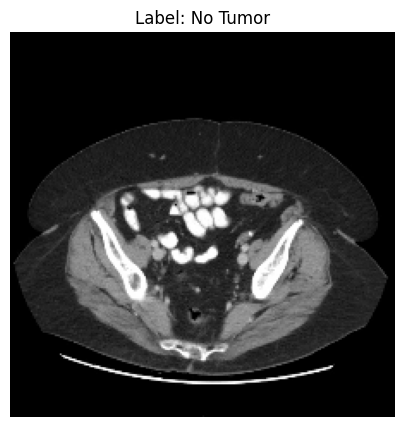

Training set size: 799
Testing set size: 200


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for dataset
BASE_DIR = r'C:\pancreatic_tumor_detection\models\train'
TUMOR_DIR = r'C:\pancreatic_tumor_detection\models\train\normal'  # Directory containing tumor images
NO_TUMOR_DIR = r'C:\pancreatic_tumor_detection\models\train\pancreatic_tumor'  # Directory containing no tumor images

# Image dimensions
IMG_SIZE = 224

# Function to load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images, labels

# Load tumor images
tumor_images, tumor_labels = load_images_from_folder(TUMOR_DIR, label=1)

# Load no tumor images
no_tumor_images, no_tumor_labels = load_images_from_folder(NO_TUMOR_DIR, label=0)

# Combine and shuffle the data
X = np.array(tumor_images + no_tumor_images)
y = np.array(tumor_labels + no_tumor_labels)

# Normalize images
X = X / 255.0  # Scale pixel values to [0, 1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display a sample image
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0])
plt.title(f"Label: {'Tumor' if y_train[0] == 0 else 'No Tumor'}")
plt.title(f"Label: {'Tumor' if y_train[0] == 1 else 'No Tumor'}")
plt.axis("off")
plt.show()

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
callbacks = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7422 - loss: 1.1618 - val_accuracy: 1.0000 - val_loss: 0.0272
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9647 - loss: 0.0837 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9567 - loss: 0.0865 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9770 - loss: 0.0459 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9882 - loss: 0.0325 - val_accuracy: 0.9875 - val_loss: 0.0234
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.9684 - loss: 0.0670
Test Accuracy: 0.98


In [11]:
model.save("pancreatic_tumor_model.h5")
print("Model saved as pancreatic_tumor_model.h5")


Model saved as pancreatic_tumor_model.h5
